# Исследование объявлений о продаже квартир


# Основная задача: 
Необходимо установить параметры для определения рыночной стоимости объектов недвижимости.

# Цель:
На основании проведенного анализа будет построена автоматизированная система, которая будет отслеживать аномалии и мошенническую деятельность.

# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./real_estate_data.csv',sep='	')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Из первичного анализа можно сделать выводы:
+ множество пропусков в различных столбцах (способы их устранения определю после более глубокого анализа);
+ наблюдается аномально маленькие и большие значения переменных (например, rooms = 0, ceiling_height = 100 и т.д.);
+ также необходимо изменить тип данных у таких столбцов, как floors_total, is_apartment, balcony и т.д.

## Предобработка данных

### Удаление пропущенных элементов

#### Удаление пропущенных элементов в столбце ceiling_height

In [5]:
data['ceiling_height'].isna().sum()

9195

<AxesSubplot:>

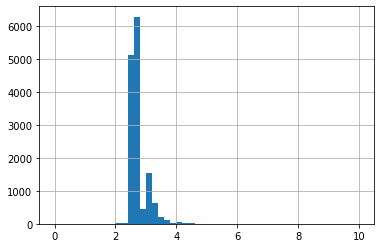

In [6]:
data['ceiling_height'].hist(bins=50, range=(0,10))

In [7]:
median_ch = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_ch)

In [8]:
data['ceiling_height'].isna().sum()

0

Анализ показал, что практически все значения колонки ceiling_height сосредоточены на участке от 2 до 3 метров, поэтому считаю целесообразным заменить пропущенные значения на медианное значение, равное 2.7.

#### Удаление пропущенных элементов в столбце floors_total

In [9]:
data['floors_total'].isna().sum()

86

<AxesSubplot:>

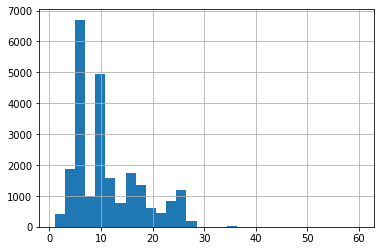

In [10]:
data['floors_total'].hist(bins=30)

In [11]:
(data['floors_total'].isna().sum() / len(data['floors_total'])) * 100

0.36288450989493226

In [12]:
data = data[data['floors_total'].isna() == False]

In [13]:
data['floors_total'].isna().sum()

0

Т.к. корректно определить высоту дома нельзя из имеющихся данных, а эта величина можно очень сильно варьироваться судя по графику, и доля записей с пропущенными значениями невелика (0,362%), то считаю возможным удалить эти строки.

#### Удаление пропущенных элементов в столбце living_area

In [14]:
data['living_area'].isna().sum()

1870

In [15]:
data.groupby(['rooms'])['living_area'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,183.0,18.865246,6.549527,2.0,16.000,18.000,19.950,68.0
1,7368.0,17.900308,3.445194,3.0,16.000,17.600,19.000,60.0
2,7279.0,31.736574,6.134196,2.0,28.100,30.500,33.900,99.5
3,5353.0,47.384711,11.223762,3.0,41.000,45.000,51.300,170.8
4,1087.0,66.936136,23.318887,5.4,52.000,63.500,76.250,250.0
5,292.0,100.009247,36.644486,23.6,76.475,91.785,116.425,301.5
6,98.0,131.799796,42.180914,68.0,101.575,124.400,158.500,300.0
7,53.0,163.564151,68.203364,57.4,119.300,145.000,193.000,347.5
8,12.0,168.683333,41.550623,107.0,152.400,161.000,179.200,260.0


In [16]:
for room in pd.Series(data['rooms'].unique()).sort_values():
    print('room', room, data.loc[data['rooms'] == room, 'living_area'].mean() / data.loc[data['rooms'] == room, 'total_area'].mean())

room 0 0.6433885224373829
room 1 0.4753913629842672
room 2 0.5684077150845581
room 3 0.6096920191944066
room 4 0.6229460582694838
room 5 0.6191863563434391
room 6 0.650633027514493
room 7 0.6164661819614146
room 8 0.6507007843641508
room 9 0.6218061699718697
room 10 0.6378579684088868
room 11 0.7088406564319747
room 12 0.4552222222222222
room 14 0.6415187376725838
room 15 0.6932203389830508
room 16 0.6666666666666666
room 19 0.7060864922584089


In [17]:
for room in pd.Series(data['rooms'].unique()).sort_values():
    living_coef = data.loc[data['rooms'] == room, 'living_area'].mean() / data.loc[data['rooms'] == room, 'total_area'].mean()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 
             'living_area'] = data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 
                                       'total_area']*living_coef

In [18]:
data['living_area'].isna().sum()

0

In [19]:
len(data[data['living_area'] > data['total_area']])

0

Жилая площадь квартиры прямо зависит от общей площади и от количества комнат (для квартир с числом комнат от 4 доля практически не меняется, но количество таких квартр находится в меньшинстве). Тогда можно заменить пропущенную жилую площадь на произведение средней доли жилой площади по отношению к общей площади в детализации по количеству комнат.


#### Удаление пропущенных элементов в столбце is_apartment

In [20]:
data['is_apartment'].isna().sum()

20838

In [21]:
data_stat = data.groupby(['is_apartment'])['ceiling_height'].describe()
data_stat['lower'] = data_stat['25%'] - 1.5*(data_stat['75%'] - data_stat['25%'])
data_stat['higher'] = data_stat['75%'] + 1.5*(data_stat['75%'] - data_stat['25%'])
data_stat

,count,mean,std,min,25%,50%,75%,max,lower,higher
is_apartment,,,,,,,,,,
False,2725.0,2.799317,1.405096,2.0,2.6,2.65,2.75,32.0,2.375,2.975
True,50.0,5.874200,14.302575,2.5,2.7,3.00,3.15,100.0,2.025,3.825


In [22]:
data.loc[data['ceiling_height'] < 3, 'is_apartment'] = data.loc[data['ceiling_height'] < 3, 'is_apartment'].fillna(False)
data.loc[data['ceiling_height'] >= 3, 'is_apartment'] = data.loc[data['ceiling_height'] >= 3, 'is_apartment'].fillna(True)

In [23]:
data['is_apartment'].isna().sum()

0

Данных по апартаментам сравнительно мало в имеющейся таблице - всего лишь 11%, что снижает вероятность корректного заполнения пропущенных значений поэтому можно ориентироваться только на косвенные признаки. Для этого решила использовать поле ceiling_height. Анализ показал, что границей нормальных значений ceiling_height для квартир с is_apartment = False явлется 2,975. Таким образом, квартиры с высотой потолков выше 3 можно считать is_apartment = True, а с меньшей - False.

#### Удаление пропущенных элементов в столбце kitchen_area

In [24]:
data['kitchen_area'].isna().sum()

2231

In [25]:
data.groupby(['rooms'])['kitchen_area'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7203.0,9.548692,3.311765,1.3,7.200,9.00,11.000,58.4
2,7270.0,9.974912,5.118034,2.0,7.000,8.70,11.300,93.0
3,5369.0,11.293906,6.904164,4.0,7.000,9.50,13.000,107.0
4,1080.0,13.663009,8.937772,4.8,8.000,11.05,15.925,77.0
5,285.0,18.367649,10.862392,5.0,11.400,15.10,20.700,66.0
6,96.0,21.098229,9.892416,5.9,14.300,19.75,26.625,56.0
7,52.0,21.998077,12.114802,5.0,15.775,20.00,25.000,70.0
8,9.0,24.866667,13.085106,5.0,22.600,25.00,29.400,45.0


In [26]:
data['kitchen_area'].isna().sum()

2231

Так как площадь кухни нельзя явно выделить из площади квартиры - судя по таблице медиана площади не имеет устойчивого роста по мере роста количества комнат. Поэтому, предлагаю не заполнять пропуски в этом столбце. 

#### Удаление пропущенных элементов в столбце balcony

In [27]:
data['balcony'].isna().sum()

11480

In [28]:
data['balcony'] = data['balcony'].fillna(0)

In [29]:
data['balcony'].isna().sum()

0

Предполагаю, что если количество балконов не указано, то оно равно 0

#### Удаление пропущенных элементов в столбце airports_nearest

In [30]:
data['airports_nearest'].isna().sum()

5532

In [31]:
data[data['airports_nearest'].isna() == False].groupby('locality_name')['airports_nearest'].describe()

,count,mean,std,min,25%,50%,75%,max
locality_name,,,,,,,,
Зеленогорск,24.0,73300.250000,3049.461011,70016.0,71618.00,72282.0,73430.00,81607.0
Колпино,337.0,26375.863501,1578.628611,23649.0,25152.00,26232.0,27542.00,31691.0
Красное Село,174.0,26610.028736,2774.123105,23892.0,25262.75,25723.5,27142.25,38367.0
Кронштадт,95.0,67469.263158,1648.522480,64931.0,65418.00,67850.0,68873.00,69785.0
Ломоносов,132.0,48308.280303,1213.279691,46502.0,47763.25,48415.5,48717.25,56896.0
Павловск,38.0,21053.342105,1298.399998,19380.0,20128.25,20529.5,22465.00,24291.0
Петергоф,201.0,40184.676617,4077.653990,34626.0,36675.00,39231.0,45444.00,46535.0
Пушкин,369.0,16447.869919,2493.217619,12157.0,14279.00,15766.0,18539.00,21055.0
Санкт-Петербург,15567.0,28040.281621,11548.999483,0.0,18575.50,26763.0,36587.00,54784.0


In [32]:
for ln in data['locality_name'].unique():
    if ln != 'Санкт-Петербург':
        median_ln = data.loc[data['locality_name'] == ln, 'airports_nearest'].median()
        data.loc[data['locality_name'] == ln, 'airports_nearest'] = data.loc[data['locality_name'] == ln, 'airports_nearest'].fillna(median_ln)

In [33]:
data['airports_nearest'].isna().sum()

5524

Для заполнения пропущенных значений показателя airports_nearest возможно использовать медианные значения этого показателя для отдельных locality_name. Однако, такой подход не работает в должной мере, так как большая часть пропущенных значений относится к locality_name, для которых из текущих данных вообще не известно airports_nearest. Поэтому решила оставить эти значения пустыми (за исключением тех, которые реально можно поставить на основании locality_name. Следует исключать Санкт-Петербург из этой процедуры, так как для разных районов расстояние до аэропорта может сильно меняться.

#### Удаление пропущенных элементов в столбце locality_name, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest

Для указанных столбцов нет возможности определить даже приблизительные значения, так как отсутствие информации о географическом положении (а также о взаимном расположении) не позволяет корректно определить название поселения, расстояние до ближайших парков, до центра соответствующих поселений и расстояние до бижайших прудов, так как эти данные получены автоматически на основе картографических данных. Поэтому приняля решение не заполнять эти столбцы.

#### Удаление пропущенных элементов в столбце days_exposition

In [34]:
data['days_exposition'].isna().sum()

3172

<AxesSubplot:>

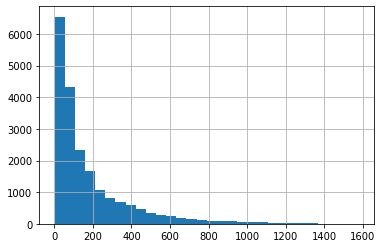

In [35]:
data['days_exposition'].hist(bins=30)

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

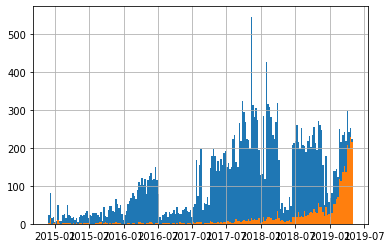

In [37]:
data['first_day_exposition'].hist(bins=200)
data.loc[data['days_exposition'].isna(), 'first_day_exposition'].hist(bins=200);

Если сопоставить гистограммы распределения Дня публикации объявления между всеми данными и данными, где отсутствовало значение поля days_exposition, то можно заметить, что у практически 90% объявлений, выставленных в середине 2019 года, отсутствует зачение days_exposition. И вообще, количество пропущенных значений имеет устойчивый рост со временем. На основании этого можно предположить, что показатель days_exposition отсутствует у объявлений, которые так и не были закрыты. 

Учитывая распределение самого  показателя first_day_exposition, это вполне возможно даже для объявлений 2015 года. В этом случае лучше всего оставить их пустыми, так как любая предположеная информация может исказить информацию о конкретном объявлении.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

### Корректировка типов

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [40]:
try:
    data['floors_total'] = data['floors_total'].astype('int', errors='ignore')
except:
    print('Не удалось изменить тип floors_total')
    
try:
    data['is_apartment'] = data['is_apartment'].astype('bool', errors='ignore')
except:
    print('Не удалось изменить тип is_apartment')
    
try:
    data['balcony'] = data['balcony'].astype('int', errors='ignore')
except:
    print('Не удалось изменить тип balcony')
    
try:
    data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
except:
    print('Не удалось изменить тип days_exposition')

Изменения типов были нужны в следующих полях:
- floors_total - необходимо было заменить на int
- is_apartment - необходимо было заменить на bool
- first_day_exposition - необходимо было заменить на datetime (было выполнено в ходе устранения пропущенных значений для получения статистики по days_exposition.
- balcony - необходимо было заменить на int
- days_exposition - необходимо было заменить на int, но при попытке поменять значений возникла ошибка из-за того, что в столбце имеются пропущенные значения.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [41]:
data['price_sq_meter'] = data['last_price'] / data['total_area']
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

def get_floor_group(df):
    if df['floor'] == df['floors_total']:
        return 'Последний'
    elif df['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'

data['floor_group'] = data.apply(get_floor_group, axis = 1)
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']


In [42]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,year,day_of_week,month,living_to_total_area,kitchen_to_total_area
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,21382.000000,23613.000000,...,8045.000000,18105.000000,9061.000000,20441.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,21382.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.724581,10.673824,34.599506,5.877313,10.564128,0.593063,...,490.554630,0.770119,518.209469,180.884839,9.939748e+04,2017.368102,2.568035,6.400076,0.563795,0.187324
std,5.681541,1.090172e+07,35.648988,1.078380,0.990085,6.597173,22.649783,4.873539,5.904316,0.960307,...,341.336698,0.939075,277.887489,219.685543,5.035802e+04,1.039383,1.788565,3.493160,0.102408,0.072976
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,2014.000000,0.000000,1.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.656250e+04,2017.000000,1.000000,3.000000,0.491620,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,2017.000000,3.000000,6.000000,0.568408,0.172348
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,232.000000,1.142061e+05,2018.000000,4.000000,10.000000,0.632035,0.232428
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000,6.000000,12.000000,1.000000,0.787879


## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [43]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,60.340678,6.540555e+06,2.071147,2.724581
std,35.648988,1.090172e+07,1.078380,0.990085
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.800000,6.799000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


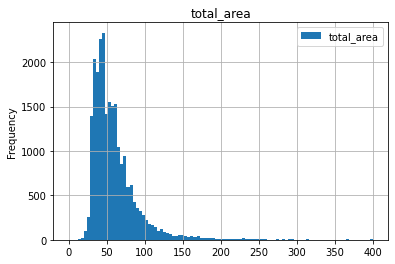

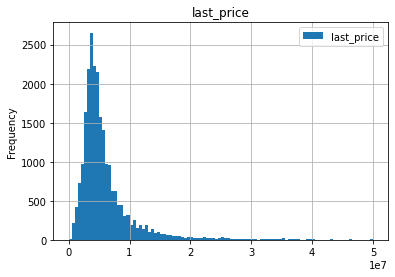

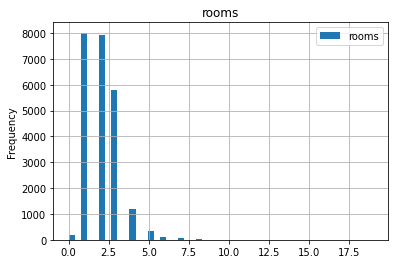

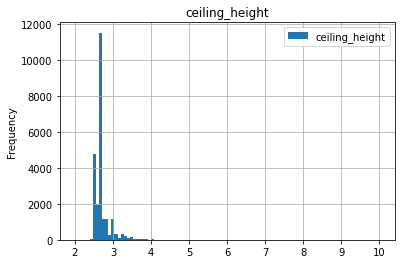

In [44]:
data.plot(kind='hist', y='total_area', bins=100, range=(0,400), title='total_area', grid=True)
plt.show()
data.plot(kind='hist', y='last_price', bins=100, range=(0, 50000000), title='last_price', grid=True)
plt.show()
data.plot(kind='hist', y='rooms', bins = 50, title='rooms', grid=True)
plt.show()
data.plot(kind='hist', y='ceiling_height', bins=100, range=(2,10), title='ceiling_height', grid=True)
plt.show()

На основании анализа можно сделать следующие выводы о параметрах:
- total_area: значения данного столбца имеют распределение похожее на распределение Пуассона. Явно выражен пик графика для значения примерно 40. При этом имеются выбивающиеся. значения - квартиры площадью от 250. В дальнейшем предлагаю убрать эти данные из таблицы. Также присутствуют аномалии, выраженные в малой клощади квартиры - существют записи с площадью 12 кв.м. Для этих данных предлагаю провести более подробный анализ и исключить их, если потребуется.

- last_price: значения данного столбца также похожм на распределение Пуассона. Пик графика находится примерно в точке 4 000 000. График боле гладкий, чем total_area и пик выражен боле явно. Присутствуют записи с выбивающимся значением цены - от 40 000 000. Также присутствуют аномалии со слишком малыми значениями - 12 190 за квартиру. Необходим более глубокий анали таких данных.

- rooms: данный показатель имеет сравнительно мало уникальных значений. При этом этом пики данного графика принадежат квартирам с 1 или 2 комнатами. Присутствуют аномальные данные со знаечнием 0 комнат, а также выбивающиеся со значением комнат от 8.

- ceiling_height: близкое значение среднего и медианы, а также низкое стандартное отклонение, говорит о высокой концентрации значений близи значений 2,7, что соответствует нормальному уровню потолков. Однако наличие хвоста с потолками высотой от 4 и до 10 метров может указывать на нестандартные квартиры, данные по которым могут влиять на все статистику. Также присутствуют аномалии - квартиры с потолками до 2 метров и от 10. Данные аномалии предлагается исключать.


### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [45]:
data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

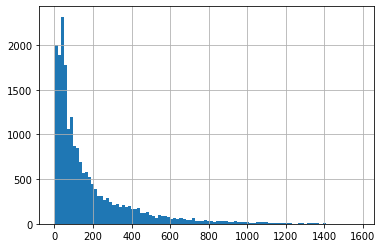

In [46]:
data['days_exposition'].hist(bins=100)

Значения показателя имеют ярко выраженное распределение Пуассона.

- Медиана = 95.0

- Среднее значение = 180.885

Среднее значение показателя больше его медианы почти в 2 раза. Это говорит о том, что большая часть значений сгрупирована слева от среднего, при этом распределение обладает большим хвостом справа. То есть большая часть объявление закрывается до полугода, однако значительная часть (порядка 30%) держится дольше. 

В качестве "очень быстрой продажи", можно считать продажи до квартиля 25%, т.е. до 45 дней.
В качестве "необычно долгой продажи" - продажи свыше нормальных значений столбца (Q3 + 1,5*(Q3-Q1) = 512.5)

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

#### Очистка от редких и выбивающихся значений показателя total_area

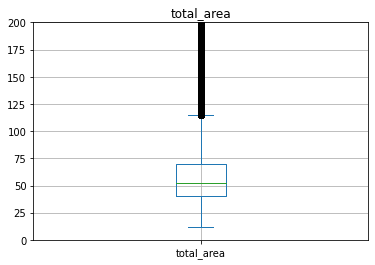

In [47]:
data.plot(kind='box', y='total_area', title='total_area', grid=True)
plt.ylim(0, 200)
plt.show()

Показатель total_area описывает общую площадь квартиры. Использование для него очистку через нормальные значения в границах (Q1 - 1.5(Q3 - Q1) и Q3 + 1.5(Q3 - Q1) может быть некорректно - есть риск исключить квартиры с большой площадью, однако не редкие. При этом колчество выбросов за пределы норальных значений очень велико и разнообразно

In [48]:
quart_between = data['total_area'].describe()['75%'] - data['total_area'].describe()['25%']
lower = data['total_area'].describe()['25%'] - 1.5*quart_between
if lower < 0:
    lower = 0
upper = data['total_area'].describe()['75%'] + 1.5*quart_between

print(lower, upper)

0 114.5


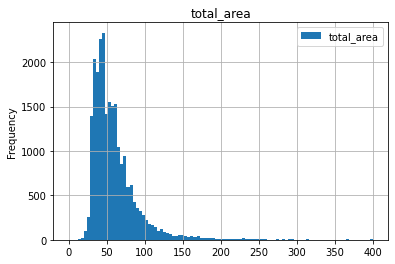

In [49]:
data.plot(kind='hist', y='total_area', bins=100, range=(0,400), title='total_area', grid=True)
plt.show()

С подобной логикой, квартиры больше 114,5 метров будут исключены из таблицы, что может быть ошбочно. При этом квартиры с аномально малой площадью не будут исключены вообще. Судя по гистограмме данного покзаателя, предлагаю поставить границы данные со значениями за пределом которых будут исключаться в 20 и 250 кв.м. Нижняя граница в 20 метров отсечет аномально малые по площади квартиры (возможно ошибочные), а таже примерно в районе 20 начинается резкий рост графика. Верхняя граница в 250 обсуловена тем, что после 250 нарушается непрерывность графика. Данные большие 250 являются действительно редкими или ошибочными.

In [50]:
data['total_area_norm'] = 1
data.loc[data['total_area'] < 20, 'total_area_norm'] = 0
data.loc[data['total_area'] > 250, 'total_area_norm'] = 0
print(data.groupby('total_area_norm')['total_area'].count())

data = data[data['total_area_norm'] == 1]
data = data.drop(columns='total_area_norm')

total_area_norm
0      138
1    23475
Name: total_area, dtype: int64


Удаленные данные составляют 0,6% от общего количства строк. Удаление подобного количества данных не должно оказать серьезного влияния на общую статистку таблицы.

#### Очистка от редких и выбивающихся значений показателя last_price

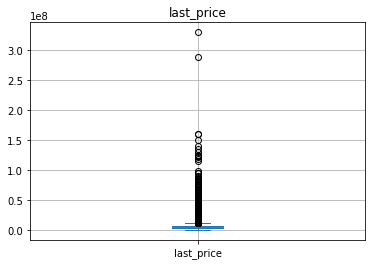

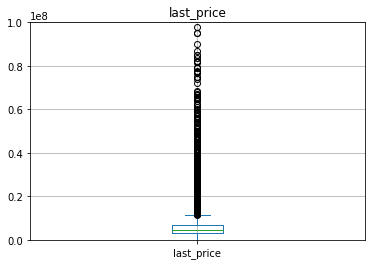

In [51]:
data.plot(kind='box', y='last_price', title='last_price', grid=True)
#plt.ylim(0, 200)
plt.show()

data.plot(kind='box', y='last_price', title='last_price', grid=True)
plt.ylim(0, 100000000)
plt.show()

Показатель last_price содержит информацию о последней цене квартиры. Использование для него очистку через нормальные значения в границах (Q1 - 1.5(Q3 - Q1) и Q3 + 1.5(Q3 - Q1) также может быть некорректно - есть риск исключить квартиры с большой ценой, однако не редкие. При этом колчество выбросов за пределы норальных значений очень велико и разнообразно

In [52]:
quart_between = data['last_price'].describe()['75%'] - data['last_price'].describe()['25%']
lower = data['last_price'].describe()['25%'] - 1.5*quart_between
if lower < 0:
    lower = 0
upper = data['last_price'].describe()['75%'] + 1.5*quart_between

print(lower, upper)

0 11650000.0


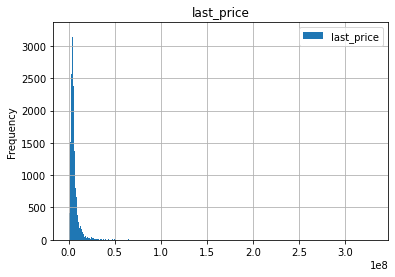

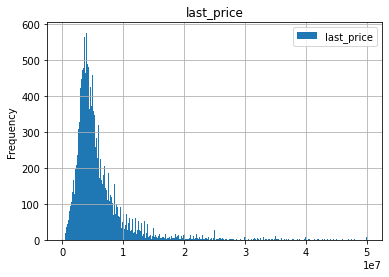

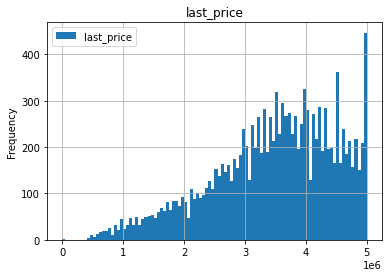

In [53]:
data.plot(kind='hist', y='last_price', bins=500, title='last_price', grid=True)
plt.show()
data.plot(kind='hist', y='last_price', bins=500, range=(0, 50000000), title='last_price', grid=True)
plt.show()
data.plot(kind='hist', y='last_price', bins=100, range=(0, 5000000), title='last_price', grid=True)
plt.show()

С подобной логикой, квартиры больше 11 650 000 метров будут исключены из таблицы, что может быть ошиочно из-за потенциального исключения квартир высокого ценового сегмента. Судя по общей гистограмме, досточно будет поставить границу в 50 000 000, так как после нее нарушается непрерывность графика и записи с ценой более 50 000 000 слишком редкие или ошибочные. Также следует исключить аномальное значение когда цена квартира равно 12 190, так как эта цена, с большой вероятностью, записана с ошибкой (либо в иной валюте, но информации об этом у нас в данных нет).

In [54]:
data['last_price_norm'] = 1
data.loc[data['last_price'] > 50000000, 'last_price_norm'] = 0
data.loc[data['last_price'] == 12190, 'last_price_norm'] = 0
data.groupby('last_price_norm')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
last_price_norm,,,,,,,,
0,77.0,8.366193e+07,4.690598e+07,12190.0,59000000.0,68000000.0,85000000.0,330000000.0
1,23398.0,5.942269e+06,4.810783e+06,430000.0,3400000.0,4600000.0,6700000.0,50000000.0


In [55]:
data = data[data['last_price_norm'] == 1]
data = data.drop(columns='last_price_norm')

Удаленные данные составляют 0,32% от общего количества строк. Удаление подобного количества данных не должно оказать серьезного влияния на общую статистику таблицы.

#### Очистка от редких и выбивающихся значений показателя rooms

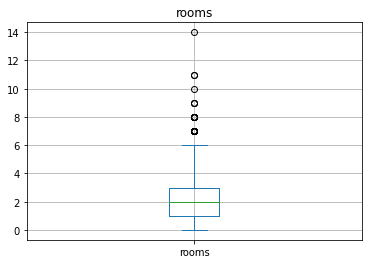

In [56]:
data.plot(kind='box', y='rooms', title='rooms', grid=True)
#plt.ylim(0, 200)
plt.show()

Судя по диаграмме, квартиры с количеством квартир большим 6 нельзя исключать из выборки, так как они не входят в границы нормальных значений и достаточно редки. Также необходимо обработать случаи, когда rooms = 0. В этом случае предлагаю использовать следующую логику - если число комнат равно 0 и это не студия (studio = False), тогда данные предполагаются ошибочными и исключаются. Иначе, оставляем. В случае студий, реально может указываться 0 комнат.

In [57]:
data['rooms_norm'] = 1
data.loc[data['rooms'] > 6, 'rooms_norm'] = 0
data.loc[(data['rooms'] == 6)&(data['studio'] == False), 'rooms_norm'] = 0
data.groupby('rooms_norm')['rooms'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms_norm,,,,,,,,
0,128.0,6.632812,1.156094,6.0,6.0,6.0,7.0,14.0
1,23270.0,2.022604,0.963427,0.0,1.0,2.0,3.0,5.0


In [58]:
data = data[data['rooms_norm'] == 1]
data = data.drop(columns='rooms_norm')

Удаленные данные составляют 0,57% от общего количства строк. Удаление подобного количества данных не должно оказать серьезного влияния на общую статистику таблицы.

#### Очистка от редких и выбивающихся значений показателя ceiling_height

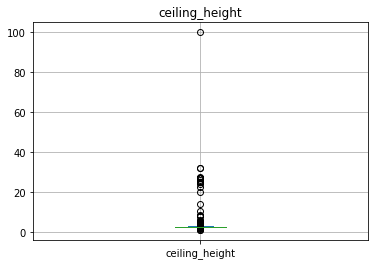

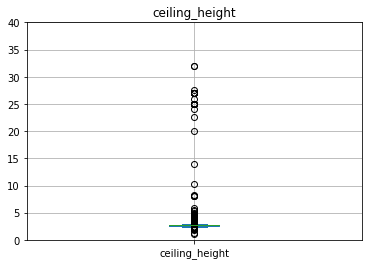

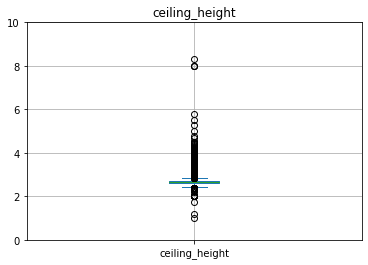

In [59]:
data.plot(kind='box', y='ceiling_height', title='ceiling_height', grid=True)
#plt.ylim(0, 200)
plt.show()

data.plot(kind='box', y='ceiling_height', title='ceiling_height', grid=True)
plt.ylim(0, 40)
plt.show()

data.plot(kind='box', y='ceiling_height', title='ceiling_height', grid=True)
plt.ylim(0, 10)
plt.show()

Высота потолка может иметь различные значения для самых разных квартир. Стандартная высота квартир составляет 2,5 - 3,5 метра, как и показано на диаграмме. Однако, более высокие варианты вплоть до 11 метров могут также присутствовать например в пентхаусах. Поэтому использование границ в 1,5 межквартильного расстояния для поисков нормальных значений не подойдет - можно исключить реальные, но редкие варинты.

Тогда, для исключения аномльных значений используем следующую логику:
- Если квартира от 2,5 до 3,5 метра высотой, то это не аномалия
- Если квартира больше 3 метров и меньше 11 и это последний этаж, то это не аномалия.
- Иначе аномалия

In [60]:
data['ceiling_height_norm'] = 0
data.loc[(data['ceiling_height'] >= 2.5)&(data['ceiling_height'] <= 3.5)&(data['locality_name'] != 'Санкт-Петербург'), 'ceiling_height_norm'] = 1
data.loc[(data['ceiling_height'] > 3.5)&(data['ceiling_height'] <= 11)&(data['locality_name'] != 'Санкт-Петербург')&(data['floor_group'] == 'Последний'), 'ceiling_height_norm'] = 1

data.loc[(data['ceiling_height'] >= 2.5)&(data['ceiling_height'] <= 5)&(data['locality_name'] == 'Санкт-Петербург'), 'ceiling_height_norm'] = 1
data.loc[(data['ceiling_height'] > 5)&(data['ceiling_height'] <= 11)&(data['locality_name'] == 'Санкт-Петербург')&(data['floor_group'] == 'Последний'), 'ceiling_height_norm'] = 1


data.groupby('ceiling_height_norm')['ceiling_height'].describe()

,count,mean,std,min,25%,50%,75%,max
ceiling_height_norm,,,,,,,,
0,114.0,8.306140,12.777649,1.0,2.4,2.45,7.25,100.0
1,23156.0,2.691648,0.205572,2.5,2.6,2.65,2.70,5.8


In [61]:
data = data[data['ceiling_height_norm'] == 1]
data = data.drop(columns='ceiling_height_norm')

Удаленные данные составляют 0.5% от общего количства строк. Удаление подобного количества данных не должно оказать серьезного влияния на общую статистику таблицы.

#### Очистка от редких и выбивающихся значений показателя days_exposition

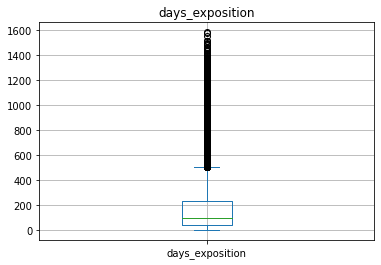

In [62]:
data.plot(kind='box', y='days_exposition', title='days_exposition', grid=True)
#plt.ylim(0, 200)
plt.show()

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

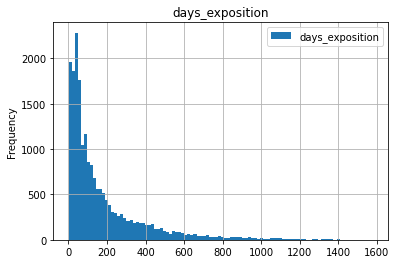

In [63]:
data.plot(kind='hist', y='days_exposition', bins=100, title='days_exposition', grid=True)

In [64]:
quart_between = data['days_exposition'].describe()['75%'] - data['days_exposition'].describe()['25%']
lower = data['days_exposition'].describe()['25%'] - 1.5*quart_between
if lower < 0:
    lower = 0
upper = data['days_exposition'].describe()['75%'] + 1.5*quart_between

print(lower, upper)

0 505.0


В отношении показателя days_exposition сложно определить какие-либо границы. Квартира может продасться как в течение пары дней, так и в течение нескольких лет. Единственно возможной границей можно указать выбранная граница "необычно долгой продажи" - продажи свыше нормальных значений столбца (Q3 + 1,5*(Q3-Q1) = 505.5). Но даже в этом случае, результаты не являтся аномальными. Предлагаю не иключать эти значени вообще.

In [65]:
print(f'Доля исключенных даных {str(round((1 - len(data)/23699)*100,2))}%')

Доля исключенных даных 2.29%


На данном этапе исключались редкие, выбивающиеся и аномальные данные из следющих столбцов таблицы:

- total_area: по результатам анализа было принято решение исключить записи, занчение которых в не входит в промежуток между 20 и 250 кв.м.
- last_price: исключаются записи с ценой больше чем 50 000 000, так как они слишком редкие или ошибочные. Также исключается аномальное значение когда цена квартира равно 12 190.
- rooms: квартиры с количеством комнат большим 6 принято исключить из выборки, как слишком редкие. Отдельно исключаются квартиры, у которых указана 0 комнат, если это не студия (studio = False)
- ceiling_height: для исключения значений используется следующую логику
        - Если квартира от 2,5 до 3,5 метра высотой и это не Санкт-Петербург, то это не аномалия
        - Если квартира больше 3 метров и меньше 11 и это последний этаж и это не Санкт-Петербург - это не аномалия.
        - Если квартира от 2,5 до 5 метра высотой и это Санкт-Петербург, то это не аномалия
        - Если квартира больше 5 метров и меньше 11 это последний этаж и это Санкт-Петербург - это не аномалия.
        - Иначе аномалия


Предложенная очистка данных исключает 2.3% исходных данных таблицы. Это является приемлимым количеством и не должно сильно повлиять на качество данных.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Влияние площади на стоимость квартир

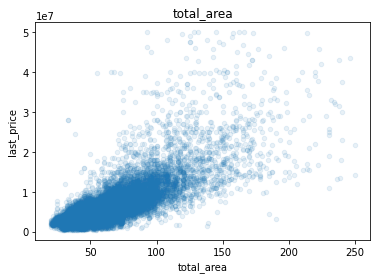

In [66]:
data.plot(x='total_area', y='last_price', kind='scatter', title = 'total_area', alpha=0.1) 
#plt.ylim(0, 200000000)
plt.show()

In [67]:
data['total_area'].corr(data['last_price'])

0.7691677148924877

Зависимость цены квартиры от общей площади хорошо показана на графике. С ростом площади, наблюдается устойчивый рост тренда цены. При большой площади усиливается разброс значений, однако тенденция к росту сохраняется. Данный разброс может обясняться иными причинами.

Также коэффициент корреляции Пирсона между этими величиами равен 0.77, что говорит о высокой зависимости между этими данными.

#### Влияние числа комнат на стоимость квартир

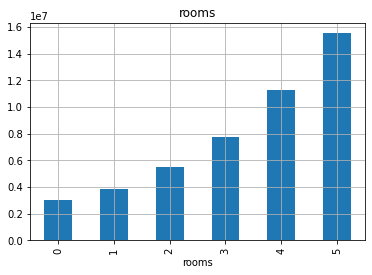

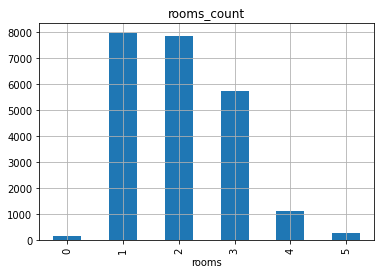

In [68]:
data.groupby('rooms')['last_price'].mean().plot(kind='bar', title = 'rooms', grid = True)
plt.show()
data.groupby('rooms')['last_price'].count().plot(kind='bar', title = 'rooms_count', grid = True) 
plt.show()

Также наблюдается прямая зависимость между средней ценой на квартиру и количеством комнат. Так, средняя цена для 1-комнатных составляет 2 500 000, а для 5-конатных 17 500 000.

#### Влияние расстояния о центра на стоимость квартир

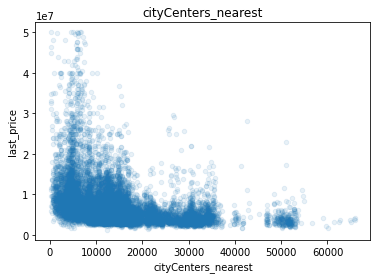

<AxesSubplot:xlabel='cityCenters_nearest_km'>

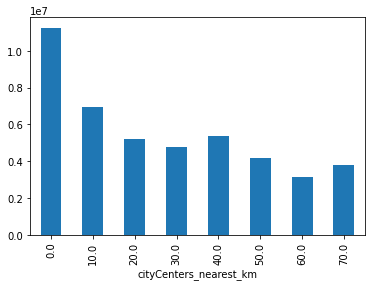

In [69]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', title = 'cityCenters_nearest', alpha=0.1) 
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(-1)
plt.show()
data.groupby('cityCenters_nearest_km')['last_price'].mean().plot(kind='bar')


In [70]:
data['cityCenters_nearest'].corr(data['last_price'])

-0.3285850566050028

По диаграмме рассеяния можно заметить, что самые дорогие квартиры в выборке находятся имеют сравнительно низкий показатель Дальности от центра. А на диграмме средних цен по километрам до центра можно увидеть стабильное снижение средней цены по мере удаления от центра. Таким образом, можно говорить в сильной зависимости цены квартиры от ее положения относительно центра города.

Коэффициент корреляции равный -0.32, что говорит о существование выраженной обратной зависимости.

#### Влияние этажа на стоимость квартир

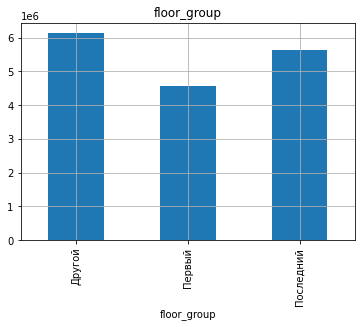

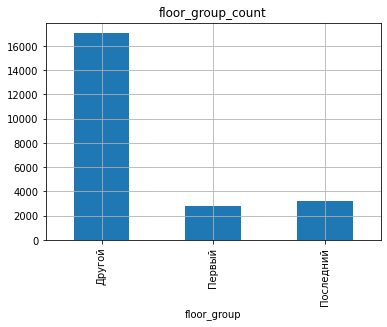

In [71]:
data.groupby('floor_group')['last_price'].mean().plot(kind='bar', title = 'floor_group', grid=True)
plt.show()
data.groupby('floor_group')['last_price'].count().plot(kind='bar', title = 'floor_group_count', grid=True)
plt.show()

Значение средней цены на Первом этаже меньше, чем на остальных типах, примерно н 1 000 000. Средние цены на Последнем этаже и на Друго этаже практически не отличаются

#### Влияние даты объявления на стоимость квартир

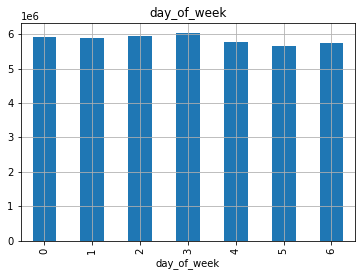

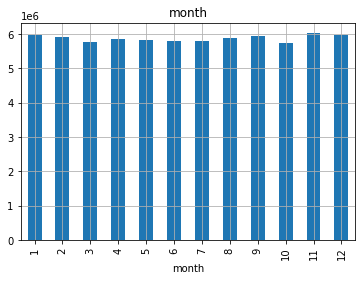

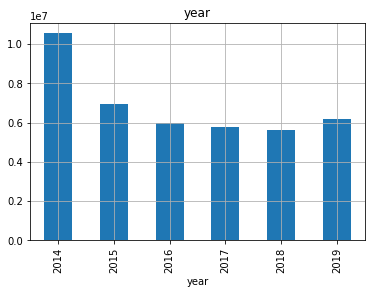

In [72]:
data.groupby('day_of_week')['last_price'].mean().plot(kind='bar', title = 'day_of_week', grid=True)
plt.show()
data.groupby('month')['last_price'].mean().plot(kind='bar', title = 'month', grid=True)
plt.show()
data.groupby('year')['last_price'].mean().plot(kind='bar', title = 'year', grid=True)
plt.show()

Явной зависимости от дня недели размещения объявления нет.

В случае месяцев можно наблюдать небольшое снижение цен на квартиры, с апреля по июнь, но потом вновь начинается резкий прирост, котрый держится на более-менее одном уровне до следующего мая.

При всем этом, можно заметить что цены на квартиры имеют тенденцию на уровне года. Средняя цена квартиры в 2015 по сравнению с 2014 сильно снижается. Затем начинается медленный рост вплоть до 2019, при этом до до уровне 2014 остается далеко.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [73]:
settlements_top = data.groupby('locality_name')['last_price'].count().sort_values(ascending = False).head(10).index

data[data['locality_name'].isin(settlements_top)].groupby('locality_name')['price_sq_meter'].mean().sort_values()

locality_name
Выборг                58245.520337
Всеволожск            68719.320400
Гатчина               68811.372828
Колпино               75352.475583
посёлок Шушары        78529.235071
посёлок Мурино        85645.903323
посёлок Парголово     90362.345200
деревня Кудрово       92473.547576
Пушкин               103309.832365
Санкт-Петербург      112317.571278
Name: price_sq_meter, dtype: float64

Наибольшая цена за квадратный метр относится к Санкт-Петербургу: 112 007. Наименьшая - к Выборгу: 58 245.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [74]:
data_sp = data[data['locality_name'] == 'Санкт-Петербург']
data_sp['cityCenters_nearest_km'] = (data_sp['cityCenters_nearest'] / 1000).round(0)

<AxesSubplot:xlabel='cityCenters_nearest_km'>

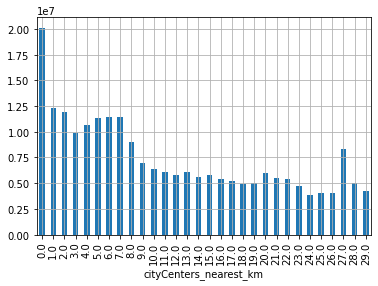

In [75]:
data_sp.groupby('cityCenters_nearest_km')['last_price'].mean().plot(kind = 'bar', grid = True)

Можно выделить 2 точки перегиба графика - на 3 км и на 9 км. После 3 км. график вновь начинает расти. После 9 км. он становится более пологим и резких падений или подъемов уже не наблюдается.

Так как граница центра в пределах 3 км. представляется мне слишком маленькой, то я определяю границу центральной зоны как 9 км.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Предполагаю, что наглядный анализ с использованием сравнений данных по центру Санкт-Петербурга с данными по всей таблице бдет более наглядным.

In [76]:
data_sp['center'] = False
data_sp.loc[data_sp['cityCenters_nearest_km'] <= 9, 'center'] = True

In [77]:
data_sp_cnt = data_sp[data_sp['center'] == True]

#### Изучение данных по параметр total_area

In [78]:
pd.DataFrame({'total': data['total_area'].describe(), 'SP center': data_sp_cnt['total_area'].describe()})

,total,SP center
count,23156.000000,4402.000000
mean,58.001657,77.460402
std,26.447619,35.768546
min,20.000000,20.000000
25%,40.000000,50.000000
50%,51.680000,70.155000
75%,68.500000,95.800000
max,250.000000,245.800000


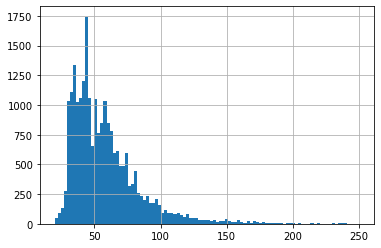

<AxesSubplot:>

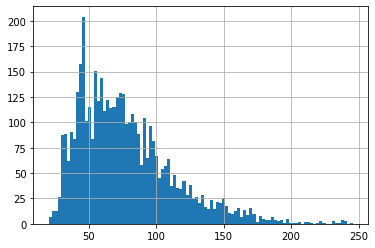

In [79]:
data['total_area'].hist(bins = 100)
plt.show()
data_sp_cnt['total_area'].hist(bins = 100)

Согласно диаграммами таблицам, в центре Санкт-Петербурга преобладают квартиры с большей площадью, чем среди данных всего города и соседних населенных пунктов. Это можно увидеть по смешению вправо средних значений и квартилей, а также по тому, что "хвост" на графике у центра Санкт-Петербурга больше, чем у всего всего города и соседних населенных пунктов.

#### Изучение данных по параметр last_price

In [80]:
pd.DataFrame({'total': data['last_price'].describe(), 'SP center': data_sp_cnt['last_price'].describe()})

,total,SP center
count,2.315600e+04,4.402000e+03
mean,5.879084e+06,1.038173e+07
std,4.698640e+06,7.361003e+06
min,4.300000e+05,1.600000e+06
25%,3.400000e+06,5.850000e+06
50%,4.600000e+06,8.200000e+06
75%,6.650000e+06,1.200000e+07
max,5.000000e+07,5.000000e+07


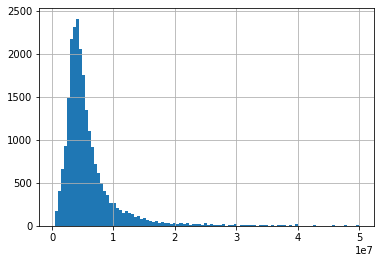

<AxesSubplot:>

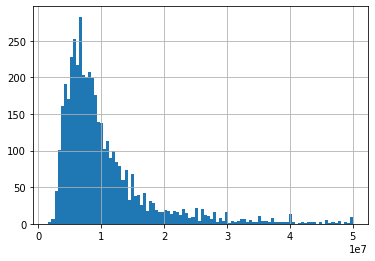

In [81]:
data['last_price'].hist(bins = 100)
plt.show()
data_sp_cnt['last_price'].hist(bins = 100)

Относительно цен, различия еще более явные - средние и квартили по центру и по всей таблице отличаются уже в разы. С другой стороны, это логично, что жилье в центре города с сопоставимыми параметрами будет гораздо дороже.

#### Изучение данных по параметр rooms

In [82]:
pd.DataFrame({'total': data['rooms'].describe(), 'SP center': data_sp_cnt['rooms'].describe()})

,total,SP center
count,23156.000000,4402.000000
mean,2.022629,2.490232
std,0.963827,1.076286
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,5.000000,5.000000


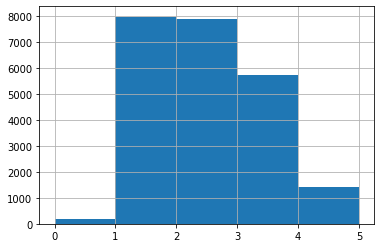

<AxesSubplot:>

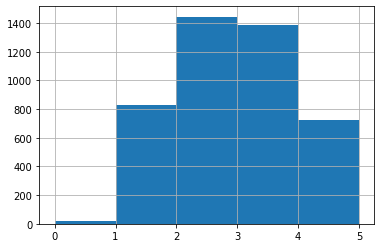

In [83]:
data['rooms'].hist(bins = 5)
plt.show()
data_sp_cnt['rooms'].hist(bins = 5)

В целом, показатель количества комнат не сильно различается между центром и всей таблицей. Однако, судя по диаграмме, в центра Санкт-Петербурга больше 2-х комнатных квартир, а то время как по всей таблице небольшой приоритет у 1-комнатных. Также в центре города выше доля 3-х комнатных квартир, она доходит практически до доли 2-х комнатных.

#### Изучение данных по параметр ceiling_height

In [84]:
pd.DataFrame({'total': data['ceiling_height'].describe(), 'SP center': data_sp_cnt['ceiling_height'].describe()})

,total,SP center
count,23156.000000,4402.000000
mean,2.691648,2.878653
std,0.205572,0.327338
min,2.500000,2.500000
25%,2.600000,2.650000
50%,2.650000,2.740000
75%,2.700000,3.000000
max,5.800000,5.800000


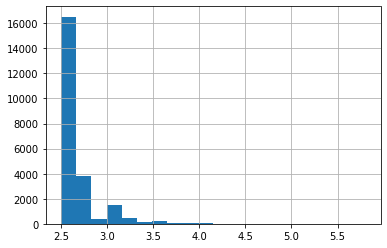

<AxesSubplot:>

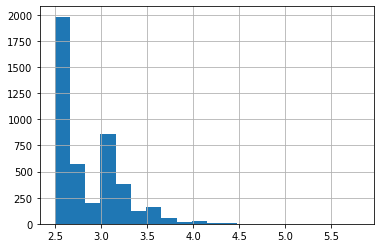

In [85]:
data['ceiling_height'].hist(bins = 20)
plt.show()
data_sp_cnt['ceiling_height'].hist(bins = 20)

Разница в показателе Высота потолков состоит только в том, что в центре выше доля потолков с высотой больше 3 метров. При этом средние и квартили практически не отличаются.

#### Изучение влияния на стоимость квартир числа площади (total_area)

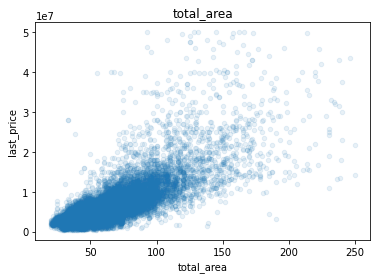

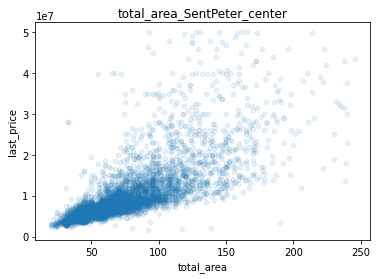

In [86]:
data.plot(x='total_area', y='last_price', kind='scatter', title = 'total_area', alpha=0.1) 
#plt.ylim(0, 200000000)
data_sp_cnt.plot(x='total_area', y='last_price', kind='scatter', title = 'total_area_SentPeter_center', alpha=0.1) 
#plt.ylim(0, 200000000)
plt.show()

In [87]:
print('Все данные', data['total_area'].corr(data['last_price']))
print('Центр Санкт-Петербурга', data_sp_cnt['total_area'].corr(data_sp_cnt['last_price']))

Все данные 0.7691677148924877
Центр Санкт-Петербурга 0.7356039329768403


Несмотря на более четкое "ядро" на графиках для данных по центру Санкт-Петербурга в сравнии с данными по всей таблице, коэффициент корреляции Пирсона для центра Санкт-Петербурга ниже чем для всей таблице между показателями Общая площадь и Цена. Однако, он все равно остается достаточно большим, чтобы говорить о сильной зависимости между этим показателями как в целом, так и для центра Санкт-Петербурга в частности.

#### Изучение влияния на стоимость квартир число комнат

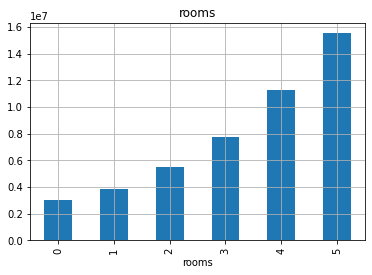

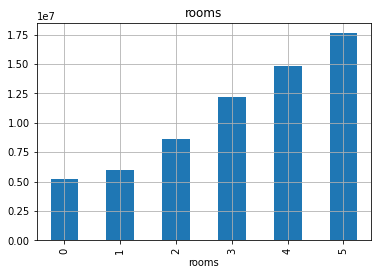

In [88]:
data.groupby('rooms')['last_price'].mean().plot(kind='bar', title = 'rooms', grid = True)
plt.show()

data_sp_cnt.groupby('rooms')['last_price'].mean().plot(kind='bar', title = 'rooms', grid = True)
plt.show()

Характер влияния сохраняется, единственная разница заключается в том, что квартиры с соответствующим в центре Санкт-Петербурга стоят больше, чем во всем городе и ближайших населенных пунктах.

#### Изучение влияния на стоимость квартир этажа

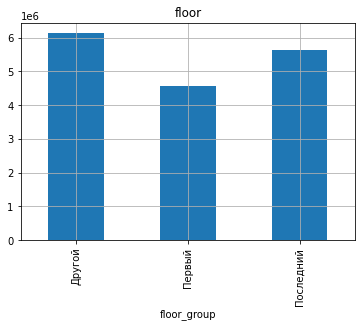

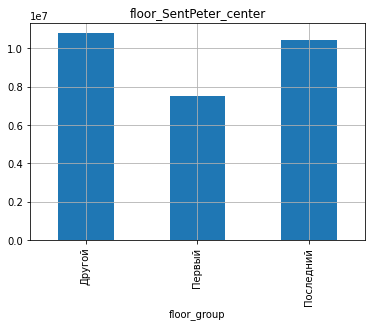

In [89]:
data.groupby('floor_group')['last_price'].mean().plot(kind='bar', title = 'floor', grid = True)
plt.show()

data_sp_cnt.groupby('floor_group')['last_price'].mean().plot(kind='bar', title = 'floor_SentPeter_center', grid = True)
plt.show()

Характер влияния сохраняется - цены первого этажа снижены, цены других этажей и последнего практически не отличаются, единственная разница заключается в том, что квартиры с соответствующим в центре Санкт-Петербурга стоят больше, чем во всем городе и ближайших населенных пунктах.

#### Изучение влияния на стоимость квартир удалённости от центра

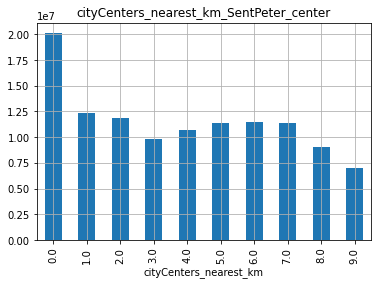

In [90]:
data_sp_cnt.groupby('cityCenters_nearest_km')['last_price'].mean().plot(kind='bar', title = 'cityCenters_nearest_km_SentPeter_center', grid = True)
plt.show()

В случае рассмотрения центра Санкт-Петербурга, удаленность от центра уже не играет такой роли.  В общем случае, минимум цен квартир уменьшает по мере удаления от центра, однако это не так явно выделяется.

#### Изучение влияния на стоимость квартир даты размещения объявления

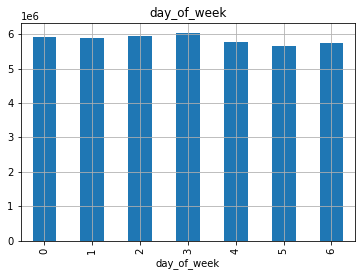

<AxesSubplot:title={'center':'day_of_week_SentPeter_center'}, xlabel='day_of_week'>

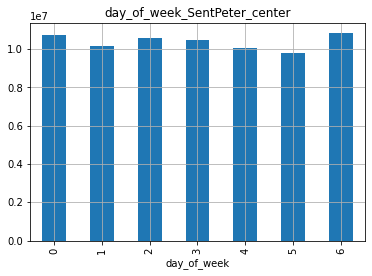

In [91]:
data.groupby('day_of_week')['last_price'].mean().plot(kind='bar', title = 'day_of_week', grid=True)
plt.show()
data_sp_cnt.groupby('day_of_week')['last_price'].mean().plot(kind='bar', title = 'day_of_week_SentPeter_center', grid=True)


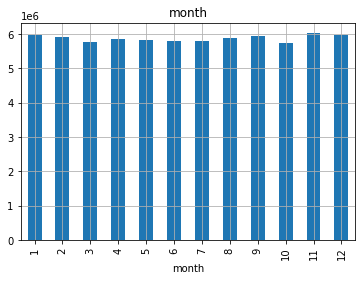

<AxesSubplot:title={'center':'month_SentPeter_center'}, xlabel='month'>

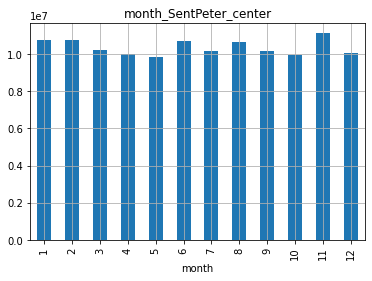

In [92]:
data.groupby('month')['last_price'].mean().plot(kind='bar', title = 'month', grid=True)
plt.show()
data_sp_cnt.groupby('month')['last_price'].mean().plot(kind='bar', title = 'month_SentPeter_center', grid=True)


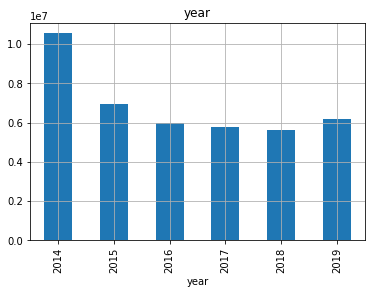

<AxesSubplot:title={'center':'year_SentPeter_center'}, xlabel='year'>

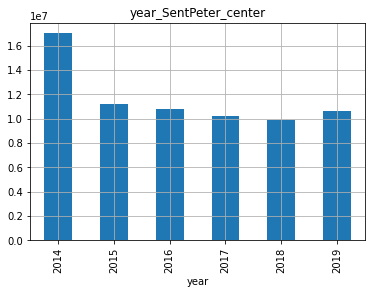

In [93]:
data.groupby('year')['last_price'].mean().plot(kind='bar', title = 'year', grid=True)
plt.show()
data_sp_cnt.groupby('year')['last_price'].mean().plot(kind='bar', title = 'year_SentPeter_center', grid=True)


В центре Санкт-Петербурга мы также наблюдаем резкое падение средней цены квартиры в 2015 году по сравнению с 2014. При этом гораздо меньше выражено снижение до 17 года и рост в 2019 году. И также, средняя цена в центре превосходит среднюю цену во всей таблице.

## Общий вывод

По результатам проведенного исследования можно сделать следующие выводы.

1) Более всего на стоимость квартиры влияет площадь квартиры, удаленность от центра и количество комнат, в меньшей степени этаж (квартиры на первом этаже обычно дешевле).

2) Дороже всего квадратный метр у квартир, находящихся в самом Санкт-Петербурге и в Пушкине (112007 и 103309), меньше всего (среди топ 10 городов по количеству объявлений) в Выборге (58245)

3) Район центра Санкт-Петербурга можно установить, как квартиры попадющие в границу 9 километров от центра. Внутри этого района сохраняются общие тенденции и зависимости между показателями с некоторыми исключениями:
- Рост доли 2-х и 3-х комнатных квартир и снижение доли 1-комнатных в сравнии с всем городом и ближайшими поселками.
- Больше квартир с потолками выше 3,5 метров.
- В целом, в разы выше средние цены на квартиры